<a href="https://colab.research.google.com/github/Vicente836/Practica-Ihealth/blob/main/Cortes_Coraz%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

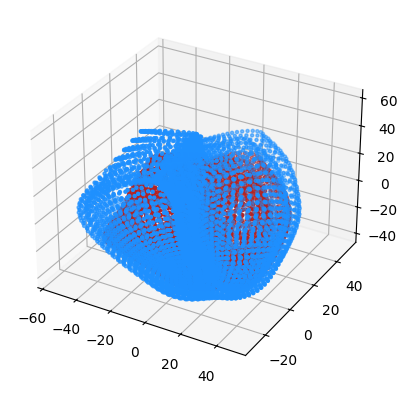

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np

# read H5 file
pc = h5.File('UKBRVLV.h5', 'r')

# note that H5PY matrices in python are transposed

# generate the first principal mode
# with 1.5 times the standard deviation
S = np.transpose(pc['MU']) + (1.5 * np.sqrt(pc['LATENT'][0,0]) * pc['COEFF'][0,:])

# get ED & ES points, & convert to 3 columns matrix [x, y, z]
N = S.shape[1] // 2
ed = np.reshape(S[0,:N], (-1,3))
es = np.reshape(S[0,N:], (-1,3))

# plot ED points in blue
# plot ES points in red
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ed[:,0], ed[:,1], ed[:,2], color='dodgerblue', marker='.')
ax.scatter(es[:,0], es[:,1], es[:,2], color='firebrick', marker='.')

Función que rezliza "num_cuts" cortes al modelo del corazón con cierta tolerancia "tol". Para cierto eje se fija una lista equiespaciada de alturas de cortes entre el vlaor mínimo y máximo en ese eje. Para un corte de altura $h$ con tolerancia $tol$, se filtran todos los puntos que tienen dicha coordenada en el rango $[h-tol, h+tol]$ y se proyectan en las coordenas restantes para formar una imagen 2D.

In [ ]:
# num_cuts: Cantidad de cortes por realizar en cada eje
# tol: Se fija la altura h de cada corte en cierto eje, luego se proyectan todos los puntos
# en el rango [h-tol, h+tol] en los ejes restantes
def cuts(num_cuts, tol):
  # Cortes en el eje x
  min_x = min(ed[:,0])
  max_x = max(ed[:,0])
  cuts_h_x= np.linspace(min_x, max_x, num_cuts)
  ed_cuts_x = []
  es_cuts_x = []
  for h in cuts_h_x:
    ed_cuts_x.append(ed[ ((h-tol)<=ed[:,0]) & (ed[:,0]<(h+tol))])
    es_cuts_x.append(es[ ((h-tol)<=es[:,0]) & (es[:,0]<(h+tol))])

  # Cortes en el eje y
  min_y= min(ed[:,1])
  max_y= max(ed[:,1])
  cuts_h_y= np.linspace(min_y, max_y, num_cuts)
  ed_cuts_y= []
  es_cuts_y= []
  for h in cuts_h_y:
    ed_cuts_y.append(ed[ ((h-tol)<=ed[:,1]) & (ed[:,1]<(h+tol))])
    es_cuts_y.append(es[ ((h-tol)<=es[:,1]) & (es[:,1]<(h+tol))])

  # Cortes en el eje z
  min_z= min(ed[:,2])
  max_z= max(ed[:,2])
  cuts_h_z= np.linspace(min_z, max_z, num_cuts)
  ed_cuts_z= []
  es_cuts_z= []
  for h in cuts_h_z:
    ed_cuts_z.append(ed[ ((h-tol)<=ed[:,2]) & (ed[:,2]<(h+tol))])
    es_cuts_z.append(es[ ((h-tol)<=es[:,2]) & (es[:,2]<(h+tol))])

  return ed_cuts_x, es_cuts_x, ed_cuts_y, es_cuts_y, ed_cuts_z, es_cuts_z

Prueba 1: Cortes con tolerancia 0.5

Text(0.5, 1.0, 'Corte número 70 en el eje z')

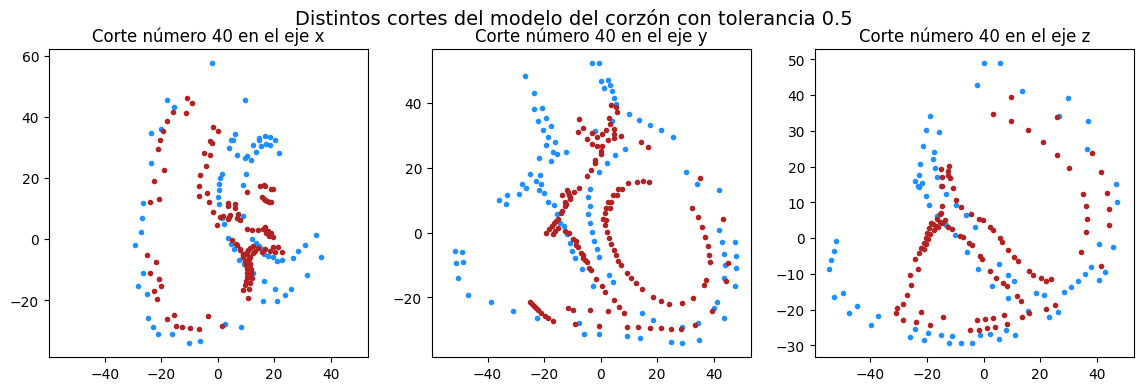

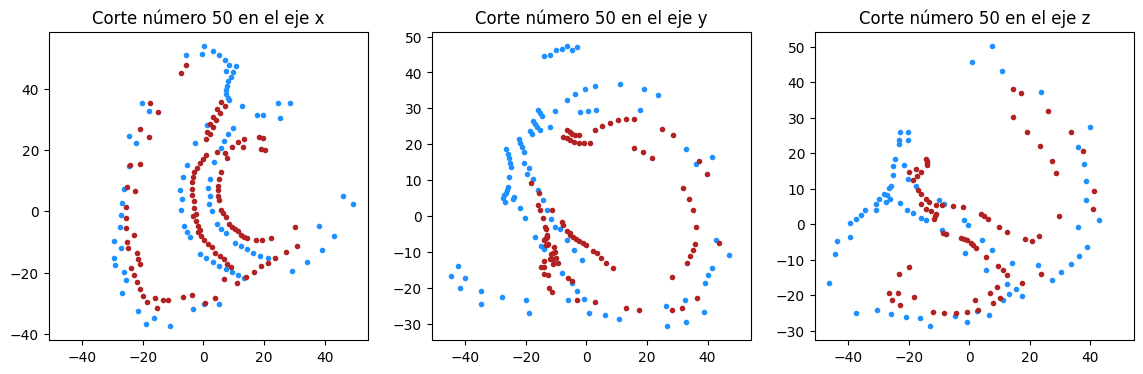

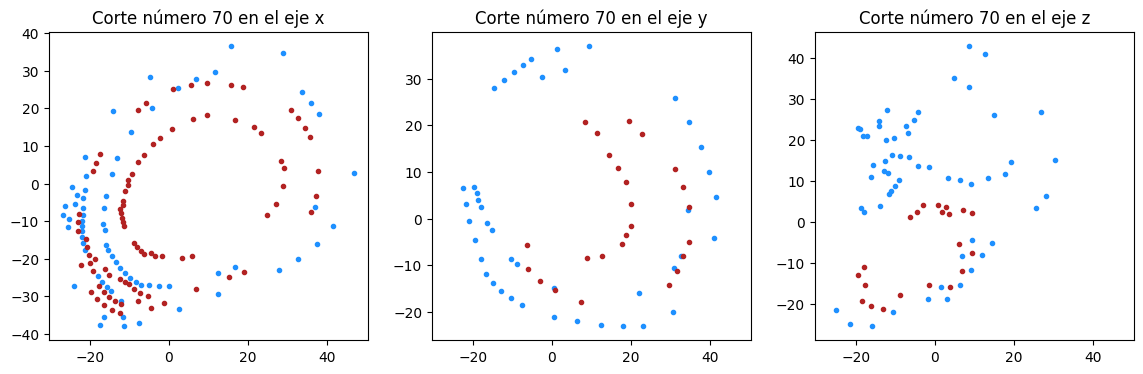

In [ ]:
num_cuts = 100
tol = 0.5
ed_cuts_x, es_cuts_x, ed_cuts_y, es_cuts_y, ed_cuts_z, es_cuts_z = cuts(num_cuts, tol)

idx = 40 # indice del corte por gráficar

ed_1_x = ed_cuts_x[idx]
es_1_x = es_cuts_x[idx]

ed_1_y = ed_cuts_y[idx]
es_1_y = es_cuts_y[idx]

ed_1_z = ed_cuts_z[idx]
es_1_z = es_cuts_z[idx]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14,4))
fig.suptitle('Distintos cortes del modelo del corzón con tolerancia {}'.format(tol), fontsize=14)

ax0.scatter(ed_1_x[:,1], ed_1_x[:,2], color='dodgerblue', marker='.')
ax0.scatter(es_1_x[:,1], es_1_x[:,2], color='firebrick', marker='.')
ax0.set_title('Corte número {} en el eje x'.format(idx))

ax1.scatter(ed_1_y[:,0], ed_1_y[:,2], color='dodgerblue', marker='.')
ax1.scatter(es_1_y[:,0], es_1_y[:,2], color='firebrick', marker='.')
ax1.set_title('Corte número {} en el eje y'.format(idx))

ax2.scatter(ed_1_z[:,0], ed_1_z[:,1], color='dodgerblue', marker='.')
ax2.scatter(es_1_z[:,0], es_1_z[:,1], color='firebrick', marker='.')
ax2.set_title('Corte número {} en el eje z'.format(idx))

idx = 50 # indice del corte por gráficar

ed_1_x = ed_cuts_x[idx]
es_1_x = es_cuts_x[idx]

ed_1_y = ed_cuts_y[idx]
es_1_y = es_cuts_y[idx]

ed_1_z = ed_cuts_z[idx]
es_1_z = es_cuts_z[idx]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14,4))

ax0.scatter(ed_1_x[:,1], ed_1_x[:,2], color='dodgerblue', marker='.')
ax0.scatter(es_1_x[:,1], es_1_x[:,2], color='firebrick', marker='.')
ax0.set_title('Corte número {} en el eje x'.format(idx,))

ax1.scatter(ed_1_y[:,0], ed_1_y[:,2], color='dodgerblue', marker='.')
ax1.scatter(es_1_y[:,0], es_1_y[:,2], color='firebrick', marker='.')
ax1.set_title('Corte número {} en el eje y'.format(idx))

ax2.scatter(ed_1_z[:,0], ed_1_z[:,1], color='dodgerblue', marker='.')
ax2.scatter(es_1_z[:,0], es_1_z[:,1], color='firebrick', marker='.')
ax2.set_title('Corte número {} en el eje z'.format(idx))

idx = 70 # indice del corte por gráficar

ed_1_x = ed_cuts_x[idx]
es_1_x = es_cuts_x[idx]

ed_1_y = ed_cuts_y[idx]
es_1_y = es_cuts_y[idx]

ed_1_z = ed_cuts_z[idx]
es_1_z = es_cuts_z[idx]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14,4))

ax0.scatter(ed_1_x[:,1], ed_1_x[:,2], color='dodgerblue', marker='.')
ax0.scatter(es_1_x[:,1], es_1_x[:,2], color='firebrick', marker='.')
ax0.set_title('Corte número {} en el eje x'.format(idx))

ax1.scatter(ed_1_y[:,0], ed_1_y[:,2], color='dodgerblue', marker='.')
ax1.scatter(es_1_y[:,0], es_1_y[:,2], color='firebrick', marker='.')
ax1.set_title('Corte número {} en el eje y'.format(idx))

ax2.scatter(ed_1_z[:,0], ed_1_z[:,1], color='dodgerblue', marker='.')
ax2.scatter(es_1_z[:,0], es_1_z[:,1], color='firebrick', marker='.')
ax2.set_title('Corte número {} en el eje z'.format(idx))

Prueba 2: Cortes con tolerancia 1

Text(0.5, 1.0, 'Corte número 70 en el eje z')

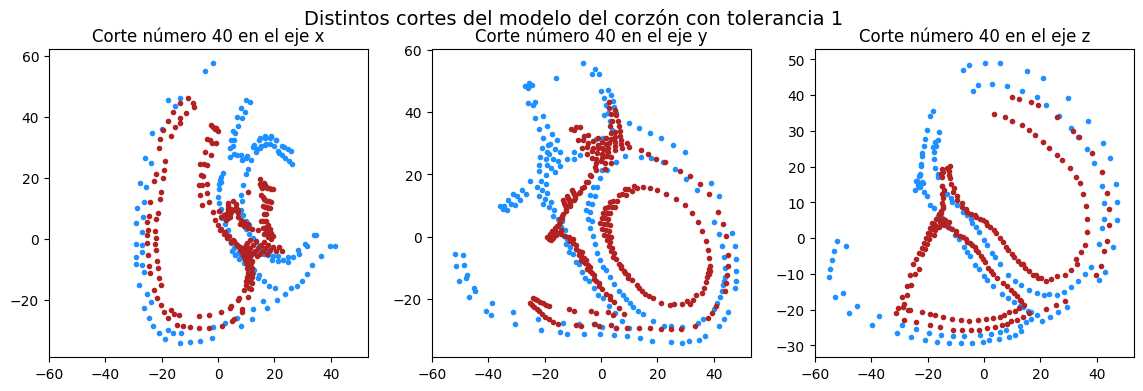

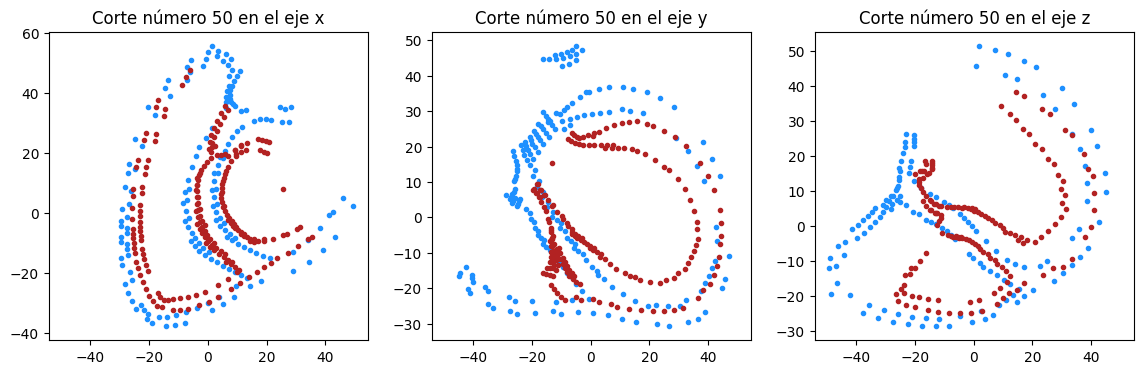

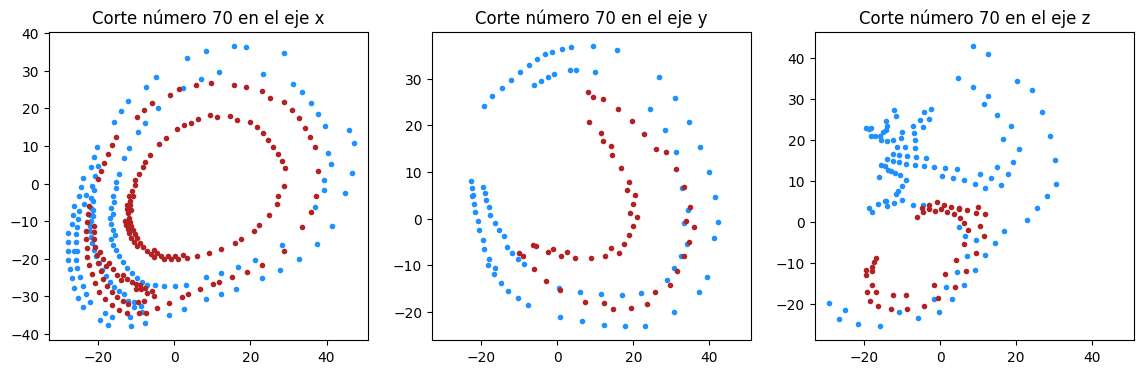

In [ ]:
num_cuts = 100
tol = 1
ed_cuts_x, es_cuts_x, ed_cuts_y, es_cuts_y, ed_cuts_z, es_cuts_z = cuts(num_cuts, tol)

idx = 40 # indice del corte por gráficar

ed_1_x = ed_cuts_x[idx]
es_1_x = es_cuts_x[idx]

ed_1_y = ed_cuts_y[idx]
es_1_y = es_cuts_y[idx]

ed_1_z = ed_cuts_z[idx]
es_1_z = es_cuts_z[idx]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14,4))
fig.suptitle('Distintos cortes del modelo del corzón con tolerancia {}'.format(tol), fontsize=14)

ax0.scatter(ed_1_x[:,1], ed_1_x[:,2], color='dodgerblue', marker='.')
ax0.scatter(es_1_x[:,1], es_1_x[:,2], color='firebrick', marker='.')
ax0.set_title('Corte número {} en el eje x'.format(idx))

ax1.scatter(ed_1_y[:,0], ed_1_y[:,2], color='dodgerblue', marker='.')
ax1.scatter(es_1_y[:,0], es_1_y[:,2], color='firebrick', marker='.')
ax1.set_title('Corte número {} en el eje y'.format(idx))

ax2.scatter(ed_1_z[:,0], ed_1_z[:,1], color='dodgerblue', marker='.')
ax2.scatter(es_1_z[:,0], es_1_z[:,1], color='firebrick', marker='.')
ax2.set_title('Corte número {} en el eje z'.format(idx))

idx = 50 # indice del corte por gráficar

ed_1_x = ed_cuts_x[idx]
es_1_x = es_cuts_x[idx]

ed_1_y = ed_cuts_y[idx]
es_1_y = es_cuts_y[idx]

ed_1_z = ed_cuts_z[idx]
es_1_z = es_cuts_z[idx]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14,4))

ax0.scatter(ed_1_x[:,1], ed_1_x[:,2], color='dodgerblue', marker='.')
ax0.scatter(es_1_x[:,1], es_1_x[:,2], color='firebrick', marker='.')
ax0.set_title('Corte número {} en el eje x'.format(idx,))

ax1.scatter(ed_1_y[:,0], ed_1_y[:,2], color='dodgerblue', marker='.')
ax1.scatter(es_1_y[:,0], es_1_y[:,2], color='firebrick', marker='.')
ax1.set_title('Corte número {} en el eje y'.format(idx))

ax2.scatter(ed_1_z[:,0], ed_1_z[:,1], color='dodgerblue', marker='.')
ax2.scatter(es_1_z[:,0], es_1_z[:,1], color='firebrick', marker='.')
ax2.set_title('Corte número {} en el eje z'.format(idx))

idx = 70 # indice del corte por gráficar

ed_1_x = ed_cuts_x[idx]
es_1_x = es_cuts_x[idx]

ed_1_y = ed_cuts_y[idx]
es_1_y = es_cuts_y[idx]

ed_1_z = ed_cuts_z[idx]
es_1_z = es_cuts_z[idx]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14,4))

ax0.scatter(ed_1_x[:,1], ed_1_x[:,2], color='dodgerblue', marker='.')
ax0.scatter(es_1_x[:,1], es_1_x[:,2], color='firebrick', marker='.')
ax0.set_title('Corte número {} en el eje x'.format(idx))

ax1.scatter(ed_1_y[:,0], ed_1_y[:,2], color='dodgerblue', marker='.')
ax1.scatter(es_1_y[:,0], es_1_y[:,2], color='firebrick', marker='.')
ax1.set_title('Corte número {} en el eje y'.format(idx))

ax2.scatter(ed_1_z[:,0], ed_1_z[:,1], color='dodgerblue', marker='.')
ax2.scatter(es_1_z[:,0], es_1_z[:,1], color='firebrick', marker='.')
ax2.set_title('Corte número {} en el eje z'.format(idx))

Prueba 3: Cortes con tolerancia 2

Text(0.5, 1.0, 'Corte número 70 en el eje z')

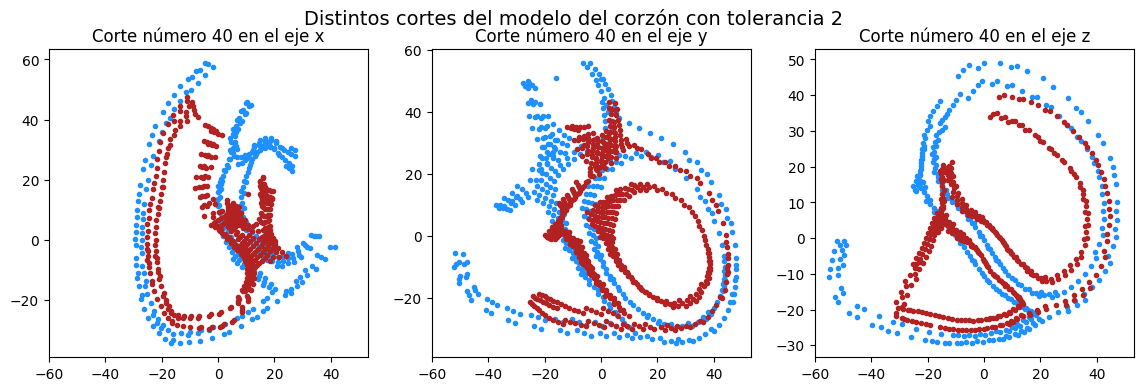

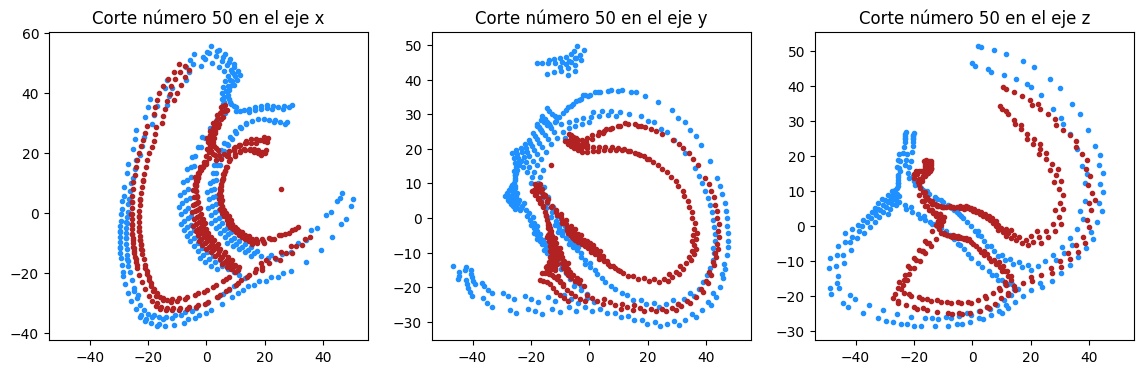

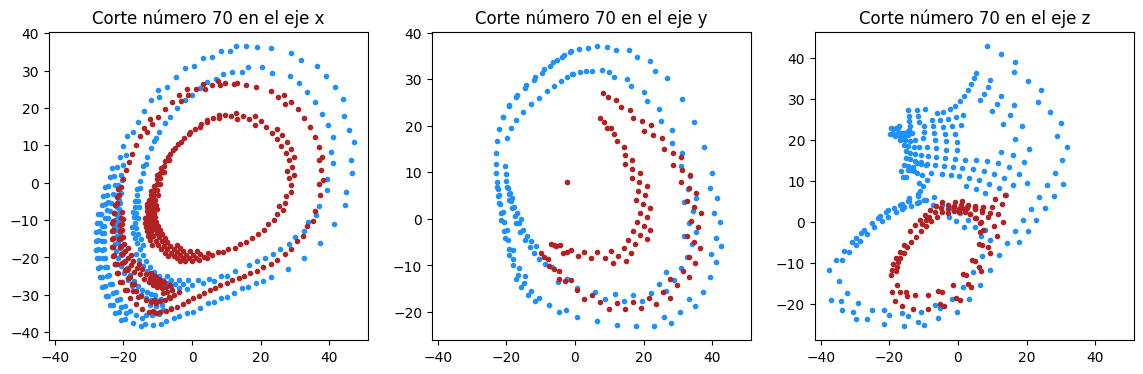

In [ ]:
num_cuts = 100
tol = 2
ed_cuts_x, es_cuts_x, ed_cuts_y, es_cuts_y, ed_cuts_z, es_cuts_z = cuts(num_cuts, tol)

idx = 40 # indice del corte por gráficar

ed_1_x = ed_cuts_x[idx]
es_1_x = es_cuts_x[idx]

ed_1_y = ed_cuts_y[idx]
es_1_y = es_cuts_y[idx]

ed_1_z = ed_cuts_z[idx]
es_1_z = es_cuts_z[idx]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14,4))
fig.suptitle('Distintos cortes del modelo del corzón con tolerancia {}'.format(tol), fontsize=14)

ax0.scatter(ed_1_x[:,1], ed_1_x[:,2], color='dodgerblue', marker='.')
ax0.scatter(es_1_x[:,1], es_1_x[:,2], color='firebrick', marker='.')
ax0.set_title('Corte número {} en el eje x'.format(idx))

ax1.scatter(ed_1_y[:,0], ed_1_y[:,2], color='dodgerblue', marker='.')
ax1.scatter(es_1_y[:,0], es_1_y[:,2], color='firebrick', marker='.')
ax1.set_title('Corte número {} en el eje y'.format(idx))

ax2.scatter(ed_1_z[:,0], ed_1_z[:,1], color='dodgerblue', marker='.')
ax2.scatter(es_1_z[:,0], es_1_z[:,1], color='firebrick', marker='.')
ax2.set_title('Corte número {} en el eje z'.format(idx))

idx = 50 # indice del corte por gráficar

ed_1_x = ed_cuts_x[idx]
es_1_x = es_cuts_x[idx]

ed_1_y = ed_cuts_y[idx]
es_1_y = es_cuts_y[idx]

ed_1_z = ed_cuts_z[idx]
es_1_z = es_cuts_z[idx]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14,4))
ax0.scatter(ed_1_x[:,1], ed_1_x[:,2], color='dodgerblue', marker='.')
ax0.scatter(es_1_x[:,1], es_1_x[:,2], color='firebrick', marker='.')
ax0.set_title('Corte número {} en el eje x'.format(idx))

ax1.scatter(ed_1_y[:,0], ed_1_y[:,2], color='dodgerblue', marker='.')
ax1.scatter(es_1_y[:,0], es_1_y[:,2], color='firebrick', marker='.')
ax1.set_title('Corte número {} en el eje y'.format(idx))

ax2.scatter(ed_1_z[:,0], ed_1_z[:,1], color='dodgerblue', marker='.')
ax2.scatter(es_1_z[:,0], es_1_z[:,1], color='firebrick', marker='.')
ax2.set_title('Corte número {} en el eje z'.format(idx))

idx = 70 # indice del corte por gráficar

ed_1_x = ed_cuts_x[idx]
es_1_x = es_cuts_x[idx]

ed_1_y = ed_cuts_y[idx]
es_1_y = es_cuts_y[idx]

ed_1_z = ed_cuts_z[idx]
es_1_z = es_cuts_z[idx]

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(14,4))
ax0.scatter(ed_1_x[:,1], ed_1_x[:,2], color='dodgerblue', marker='.')
ax0.scatter(es_1_x[:,1], es_1_x[:,2], color='firebrick', marker='.')
ax0.set_title('Corte número {} en el eje x'.format(idx))

ax1.scatter(ed_1_y[:,0], ed_1_y[:,2], color='dodgerblue', marker='.')
ax1.scatter(es_1_y[:,0], es_1_y[:,2], color='firebrick', marker='.')
ax1.set_title('Corte número {} en el eje y'.format(idx))

ax2.scatter(ed_1_z[:,0], ed_1_z[:,1], color='dodgerblue', marker='.')
ax2.scatter(es_1_z[:,0], es_1_z[:,1], color='firebrick', marker='.')
ax2.set_title('Corte número {} en el eje z'.format(idx))